<a href="https://colab.research.google.com/github/oliverquintana/DeepLearningTensorFlow/blob/master/TumorCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2

path_images = '/content/drive/My Drive/Dataset MRI/tumor_images'
path_masks = '/content/drive/My Drive/Dataset MRI/tumor_masks'

def get_images(mypath):
    onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    onlyfiles.sort()
    images = np.empty(len(onlyfiles), dtype=object)
    images = np.zeros((len(onlyfiles),256,256))
    print(len(onlyfiles))
    for n in range(len(onlyfiles)):
        images[n] = cv2.imread( join(mypath,onlyfiles[n]), 0)

    return images

def get_labels(array):
    labels = []
    for i in array:
        if np.max(i) > 0:
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(labels)

In [0]:
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2

path_images = '/content/drive/My Drive/Dataset MRI/data/'
path_masks = '/content/drive/My Drive/Dataset MRI/tumor_masks'

def get_images(mypath):
    onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    onlyfiles.sort()
    images = np.empty(len(onlyfiles), dtype=object)
    images = np.zeros((len(onlyfiles),256,256))
    #print(len(onlyfiles))
    for n in range(len(onlyfiles)):
        temp = str(onlyfiles[n])
        if temp.endswith(".tif"):
            print(temp)
        images[n] = cv2.imread( join(mypath,onlyfiles[n]), 0)

    return

def get_labels(array):
    labels = []
    for i in array:
        if np.max(i) > 0:
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(labels)

In [0]:
#print(get_images(path_images))
get_images(path_images)
#training_images = get_images(path_images)
#training_masks = get_images(path_masks)
#training_labels = get_labels(training_masks)

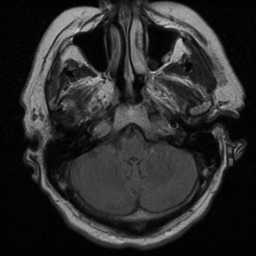

0


In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(training_images[19])

training_labels = get_labels(training_masks)
print(training_labels[19])

In [0]:
training_images_r = training_images.reshape(len(training_images), 256, 256, 1)
print(training_labels.shape)
print(training_images.shape)
#training_labels = training_labels.reshape(len(training_labels), 65536,1)

(23,)
(23, 256, 256)


In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dense(32, activation = 'relu'),
                                    tf.keras.layers.Dense(16, activation = 'relu'),
                                    tf.keras.layers.Dense(4, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'softmax')
                                    ])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images_r, training_labels, epochs=5)

Train on 23 samples
Epoch 1/5
23/23 [==============================] - 0s 5ms/sample - loss: nan - acc: 0.3478
Epoch 2/5
23/23 [==============================] - 0s 1ms/sample - loss: nan - acc: 0.6522
Epoch 3/5
23/23 [==============================] - 0s 910us/sample - loss: nan - acc: 0.6522
Epoch 4/5
23/23 [==============================] - 0s 906us/sample - loss: nan - acc: 0.6522
Epoch 5/5
23/23 [==============================] - 0s 916us/sample - loss: nan - acc: 0.6522


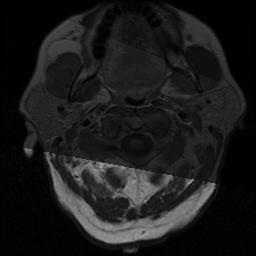

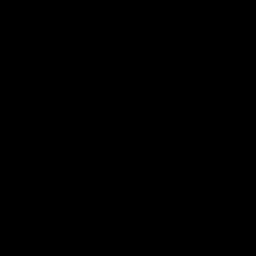

0


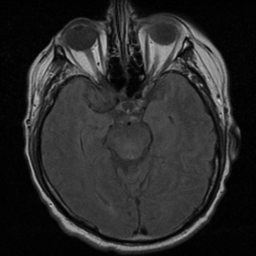

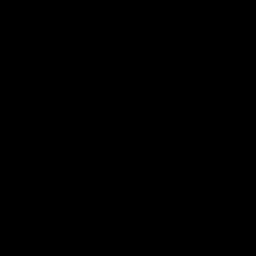

0


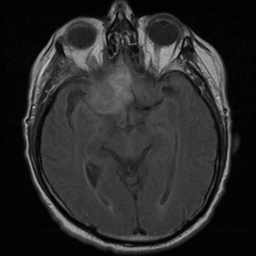

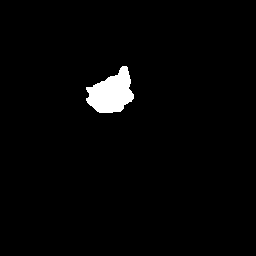

1


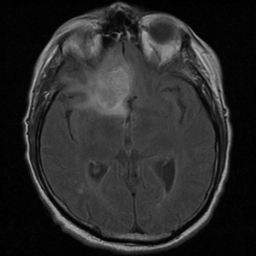

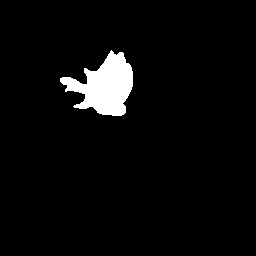

1


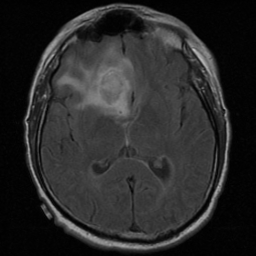

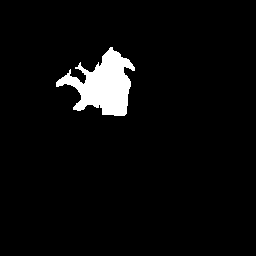

1


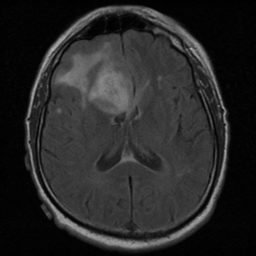

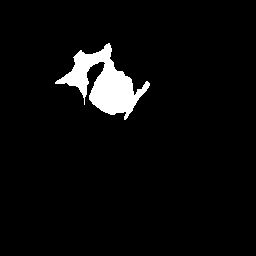

1


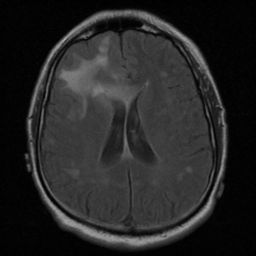

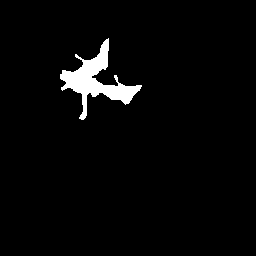

1


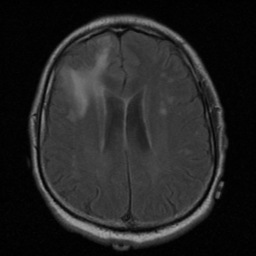

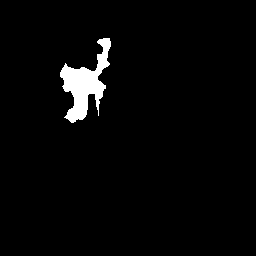

1


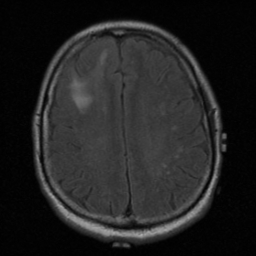

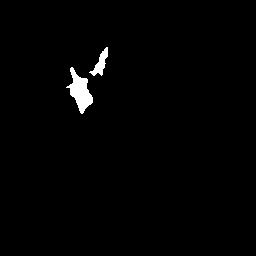

1


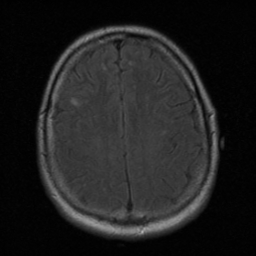

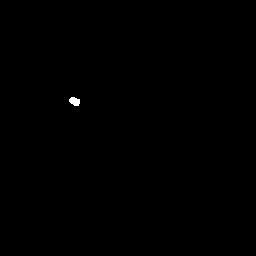

1


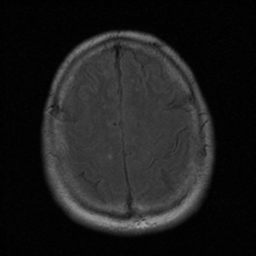

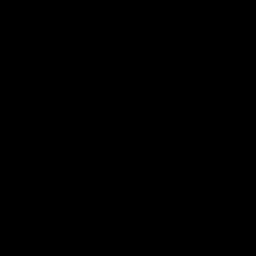

0


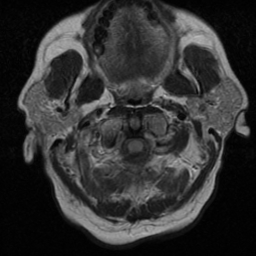

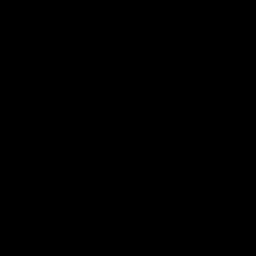

0


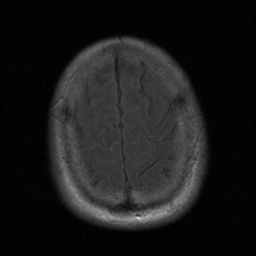

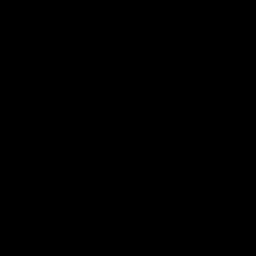

0


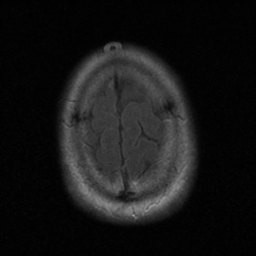

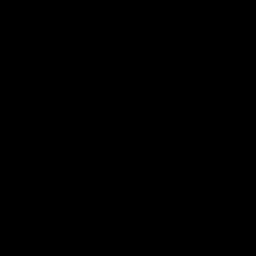

0


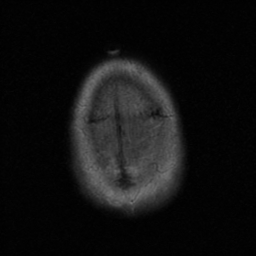

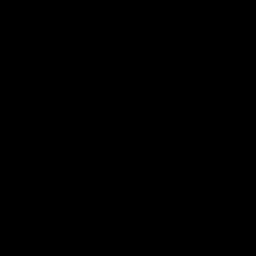

0


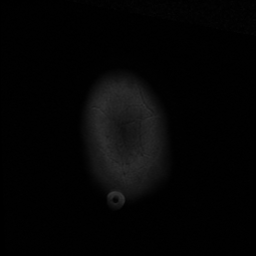

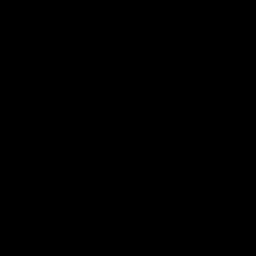

0


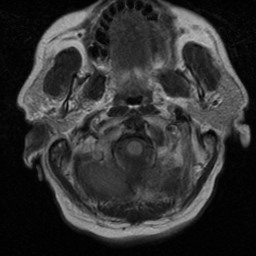

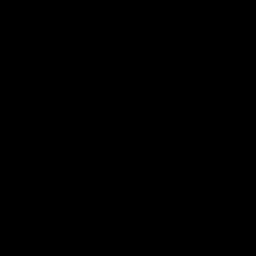

0


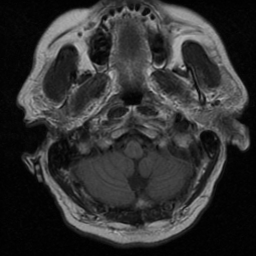

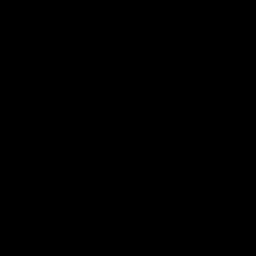

0


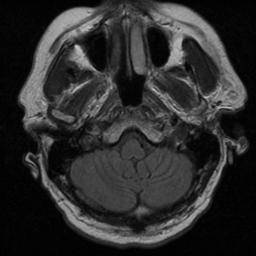

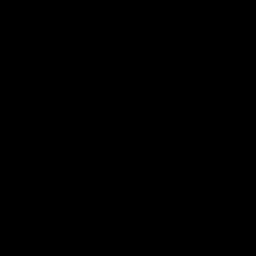

0


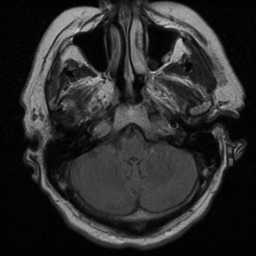

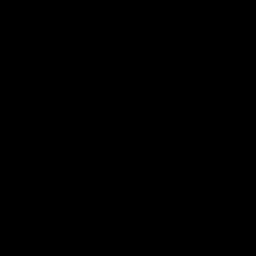

0


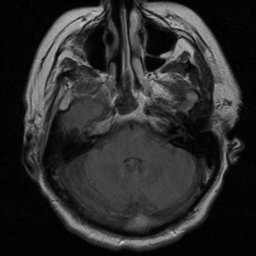

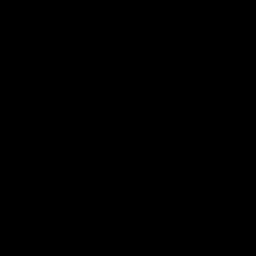

0


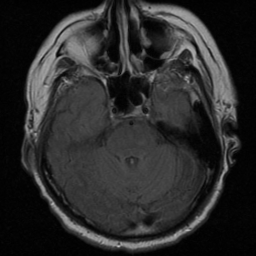

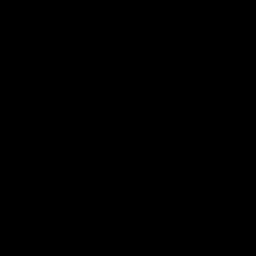

0


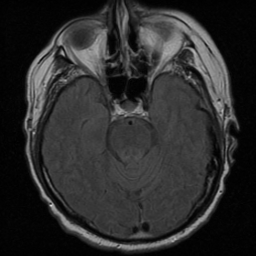

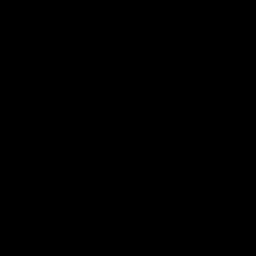

0


In [0]:
for i in range(len(training_images)):
    cv2_imshow(training_images[i])
    cv2_imshow(training_masks[i])
    print(training_labels[i])